<a href="https://colab.research.google.com/github/2021B0121099/Diabetes-Prediction-Using-Machine-Learning/blob/main/Diabetes_Prediction_uisng_Small_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import psutil
import time
process = psutil.Process()
!
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore")

from pandas import set_option
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics, tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.metrics import precision_recall_curve, f1_score, auc, roc_curve, roc_auc_score

**Exploratory Data Analysis**

In [ ]:
diabetes_data = pd.read_csv('diabetes_dummy_dataset.csv') # Import diabetes dataset
diabetes_data.head(10)

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1,6,107,83,15,196,50.0,0.84,78,0
1,2,3,163,84,18,120,21.4,1.10,71,0
2,3,12,124,53,42,231,34.0,1.81,29,0
3,4,14,169,51,34,219,30.3,1.03,21,1
4,5,10,70,98,22,84,45.7,1.51,21,1
5,6,7,187,85,18,58,33.2,0.54,79,0
6,7,12,150,62,22,242,21.6,1.54,43,0
7,8,4,148,65,40,198,38.3,2.17,36,1
8,9,6,85,49,20,121,42.7,2.18,51,1
9,10,9,145,112,13,98,18.1,1.84,35,1


In [ ]:
# Information of datasets
print("The scale of data is", diabetes_data.shape, "\n")
diabetes_data.info()

The scale of data is (700, 10) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               700 non-null    int64  
 1   Pregnancies             700 non-null    int64  
 2   PlasmaGlucose           700 non-null    int64  
 3   DiastolicBloodPressure  700 non-null    int64  
 4   TricepsThickness        700 non-null    int64  
 5   SerumInsulin            700 non-null    int64  
 6   BMI                     700 non-null    float64
 7   DiabetesPedigree        700 non-null    float64
 8   Age                     700 non-null    int64  
 9   Diabetic                700 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 54.8 KB


In [ ]:
# Statistical of datasets
# Drop the PatientID columns and transpose the data
diabetes_data.drop(columns=['PatientID']).describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,700.0,6.910000,4.376640,0.00,3.0000,7.000,11.000,14.00
PlasmaGlucose,700.0,124.861429,44.023689,50.00,87.0000,124.000,163.000,199.00
DiastolicBloodPressure,700.0,74.052857,25.907093,30.00,51.7500,74.000,96.000,119.00
TricepsThickness,700.0,29.424286,11.410471,10.00,19.7500,30.000,39.000,49.00
SerumInsulin,700.0,156.221429,80.953886,15.00,85.5000,156.000,224.000,299.00
BMI,700.0,34.495429,9.061857,18.00,27.0000,34.750,42.325,50.00
DiabetesPedigree,700.0,1.301186,0.691491,0.11,0.6975,1.325,1.900,2.49
Age,700.0,49.767143,17.402047,20.00,35.0000,49.000,65.000,79.00
Diabetic,700.0,0.477143,0.499834,0.00,0.0000,0.000,1.000,1.00


In [ ]:
# Reviewing Skew of Attribute Distribution
skew_value = diabetes_data.skew()

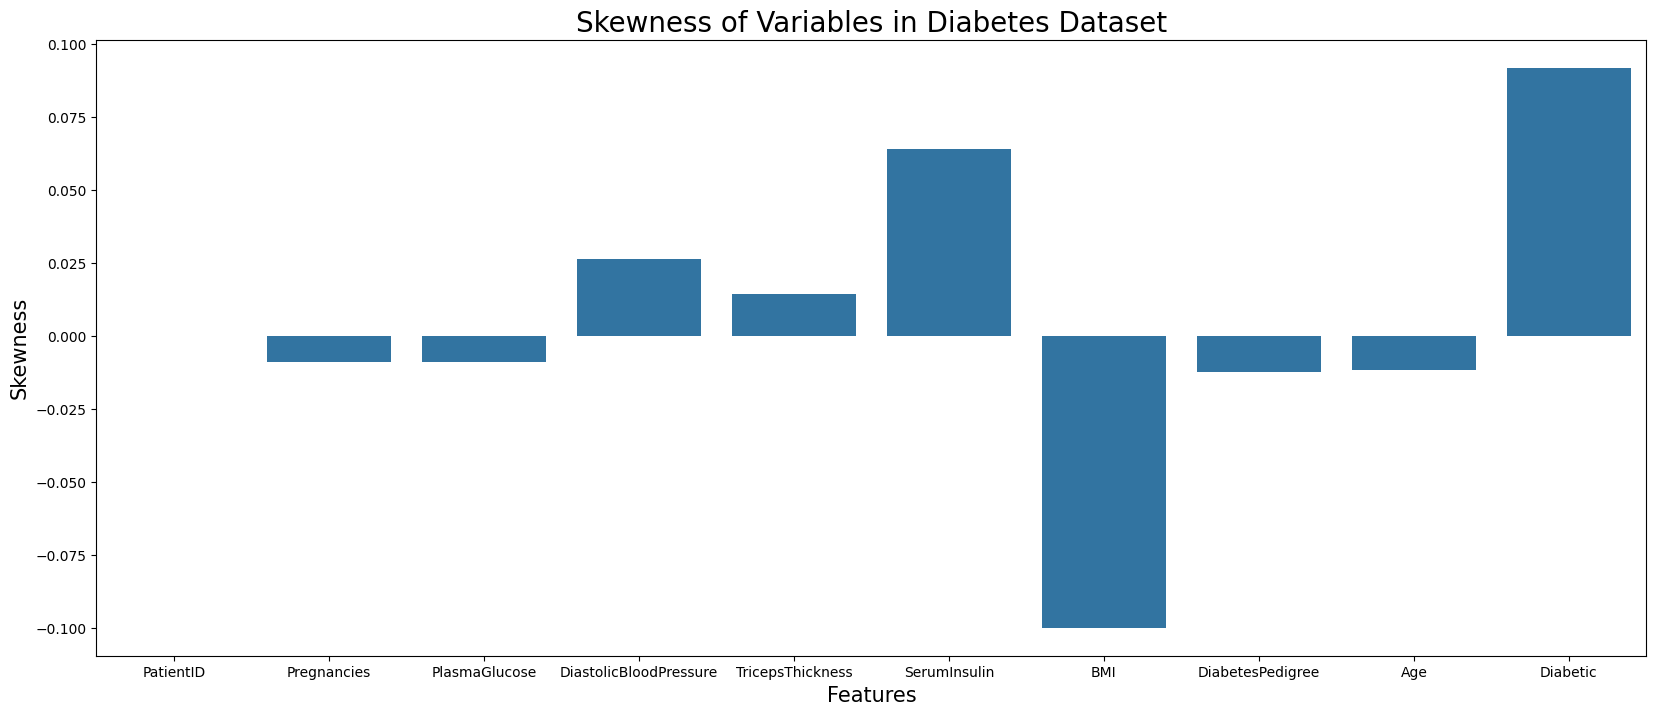

In [ ]:
skewness_values = pd.DataFrame({
    'Variable': diabetes_data.columns,
    'Skewness': skew_value
})
plt.figure(figsize=(20,8))
# Plot the skewness values using a barplot
sns.barplot(x='Variable', y='Skewness', data=skewness_values)

# Add labels and a title to the plot

plt.xlabel("Features",size=15)
plt.ylabel("Skewness",size=15)
plt.title("Skewness of Variables in Diabetes Dataset",size=20)

plt.show()

**Data Visualization**

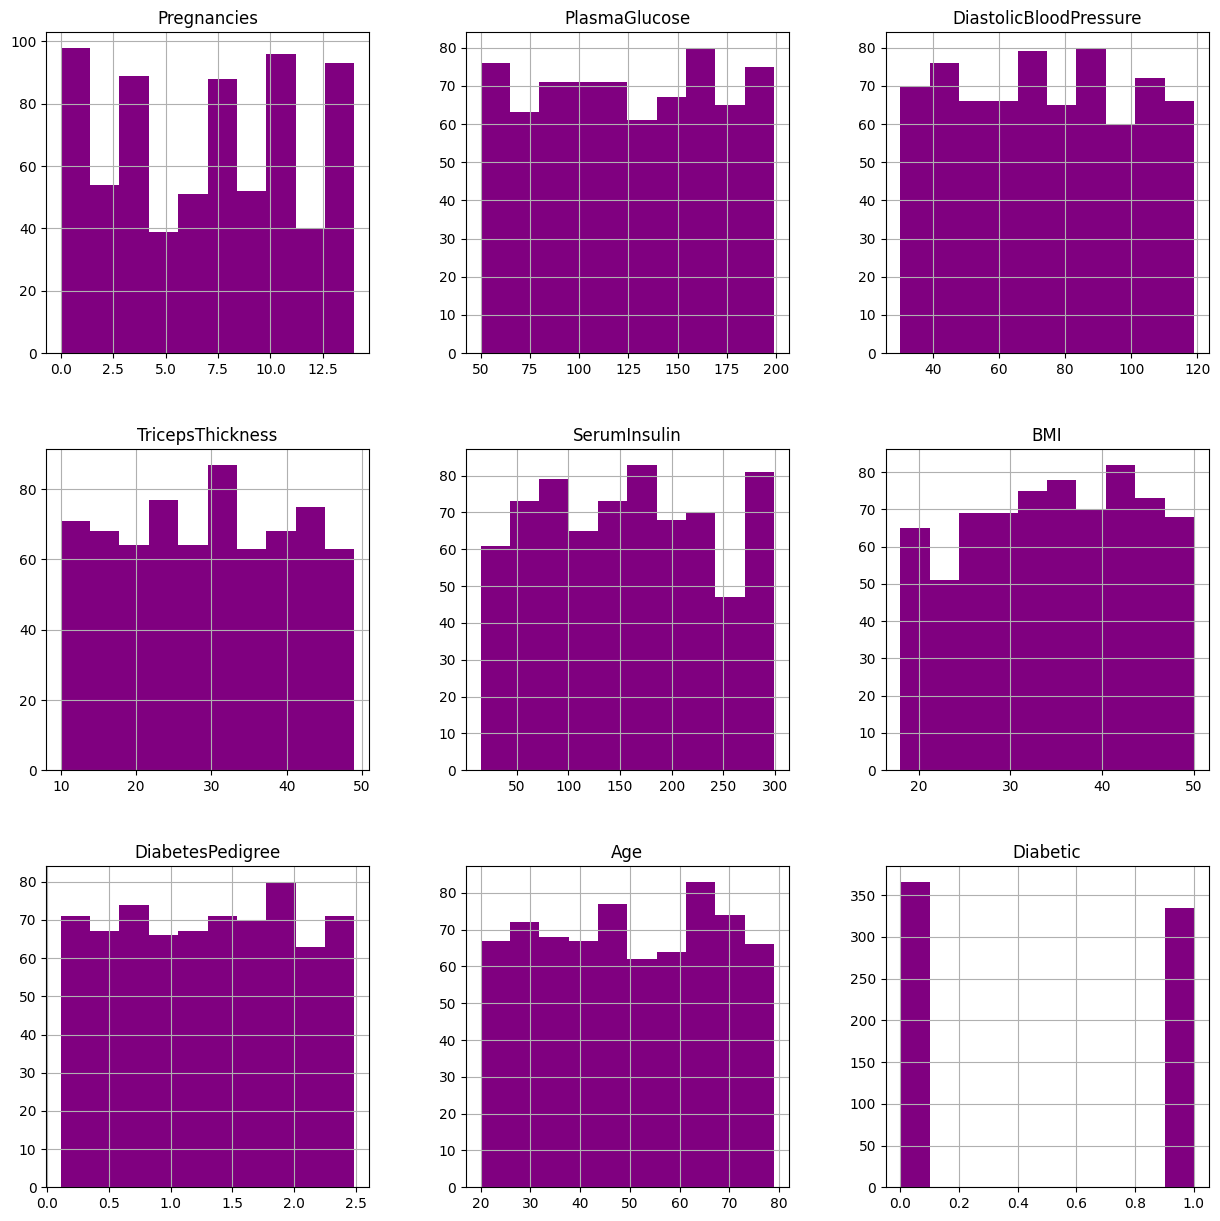

In [ ]:
# Histrogram for each attribute in dataset
diabetes_data.hist(figsize=(15,15),column=diabetes_data.drop(columns=['PatientID']).columns,color='purple')
plt.show()

Diabetic
0    366
1    334
dtype: int64


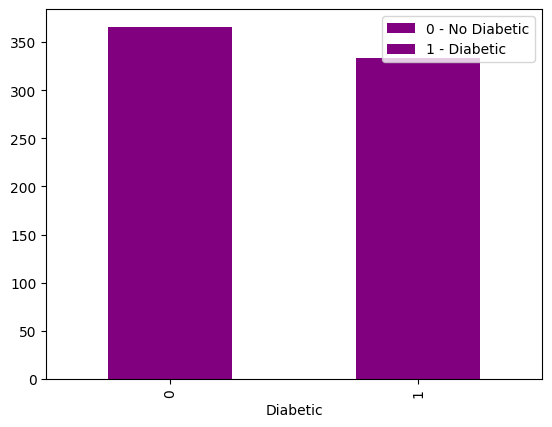

In [ ]:
# Class distribution to preview diabetic statistics
result = diabetes_data.groupby('Diabetic').size()
print(result)
ax = result.plot(kind='bar',color='purple',label='0 - No Diabetic')
ax = result.plot(kind='bar',color='purple',label='1 - Diabetic')
ax.legend(loc='best')

In [ ]:
# Define the feature matrix and target vector before feature selection
X = diabetes_data.drop(columns=['Diabetic'])
y = diabetes_data['Diabetic']
print(X,y)

     PatientID  Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
0            1            6            107                      83   
1            2            3            163                      84   
2            3           12            124                      53   
3            4           14            169                      51   
4            5           10             70                      98   
..         ...          ...            ...                     ...   
695        696           13             60                      98   
696        697            1             89                     119   
697        698            2             60                      91   
698        699            8            162                      95   
699        700            6             88                      93   

     TricepsThickness  SerumInsulin   BMI  DiabetesPedigree  Age  
0                  15           196  50.0              0.84   78  
1                  18    

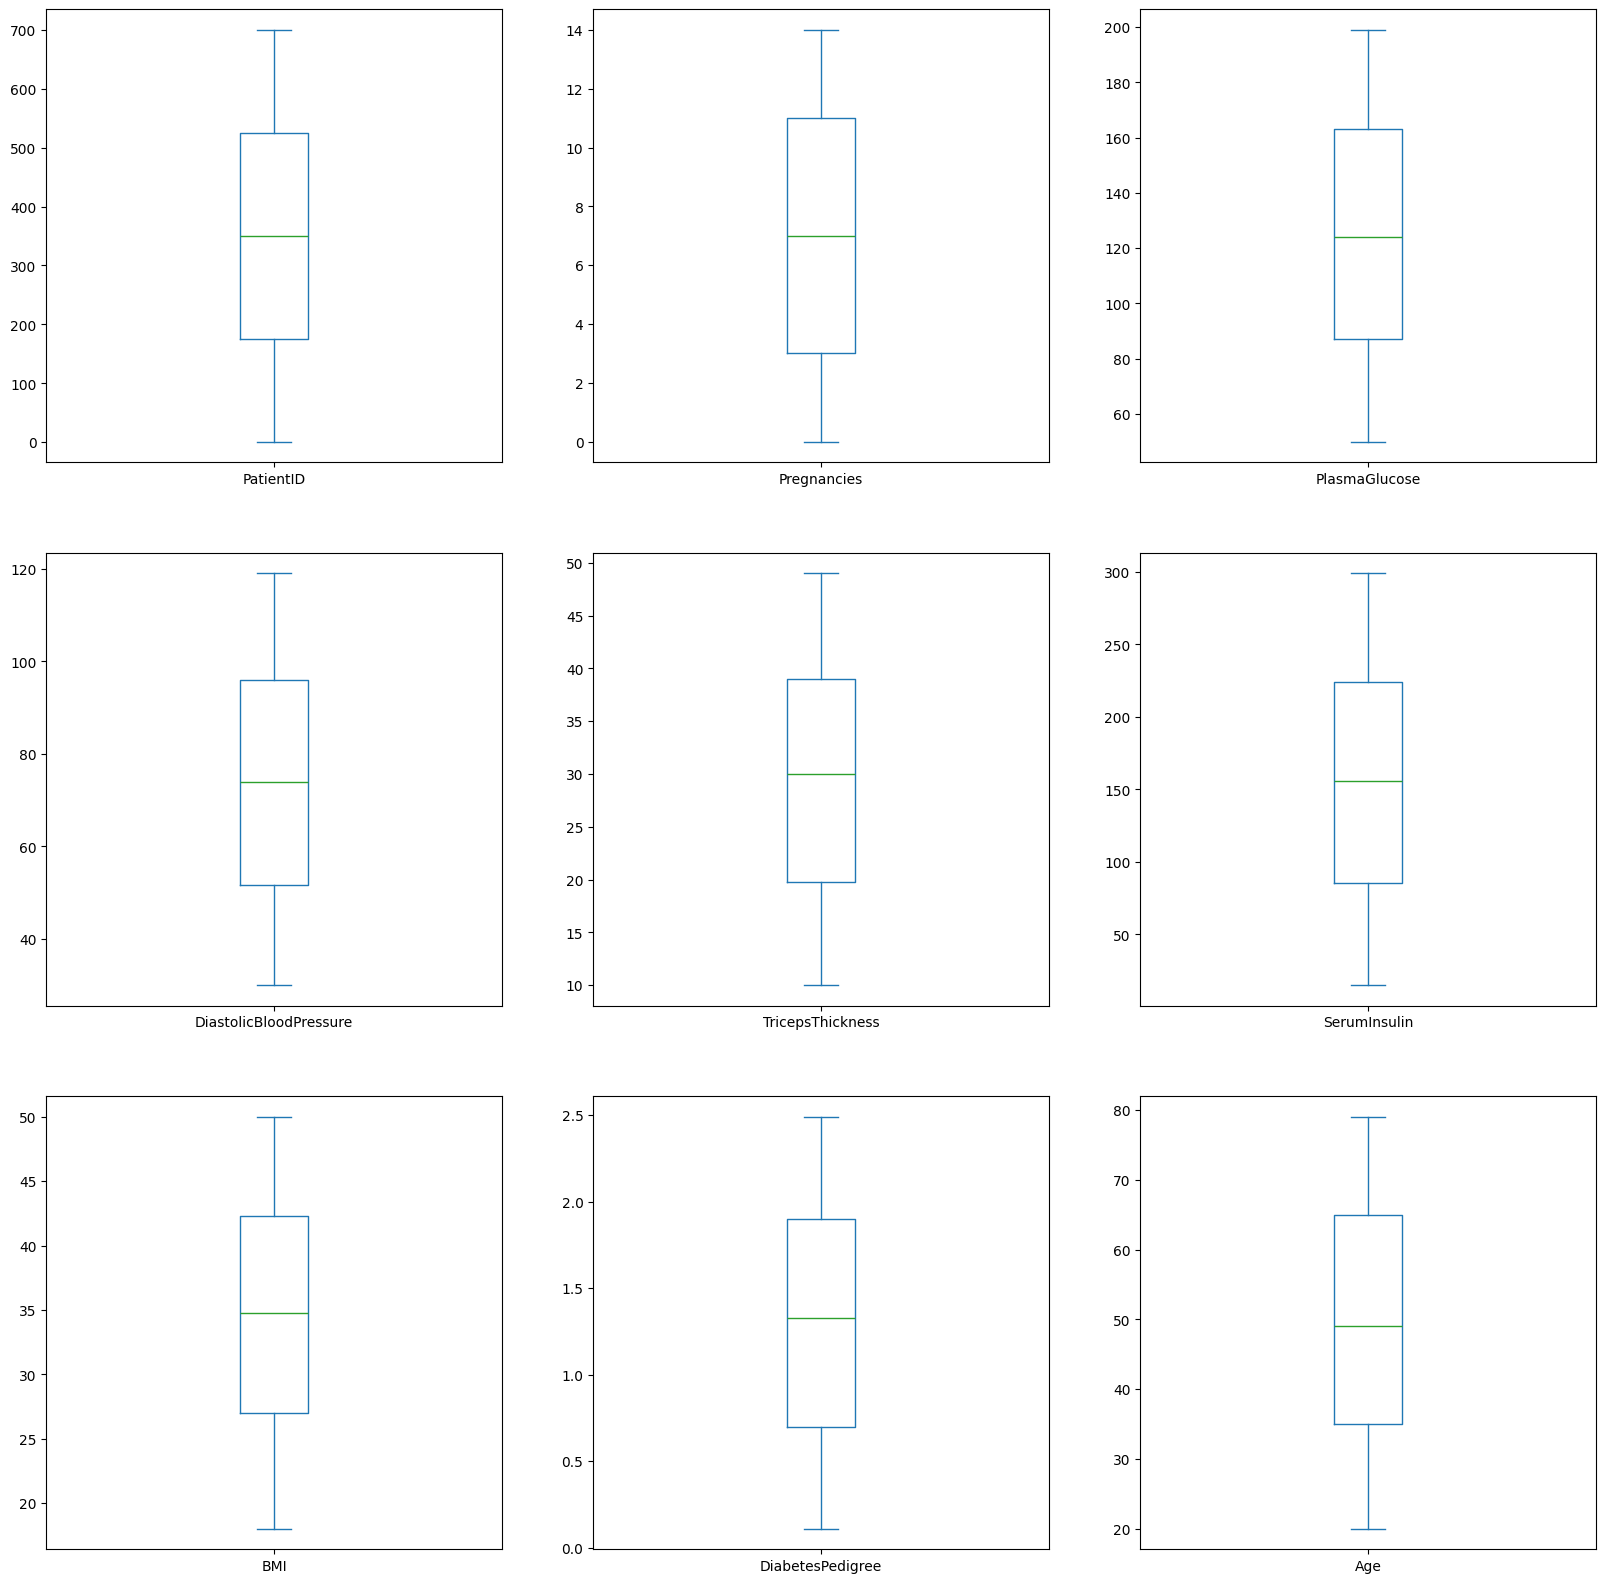

In [ ]:
# Box and Whisker Plots
X.plot(figsize=(20,20),kind='box',subplots=True,layout=(3,3),sharex=False)
plt.show()

**Feature Selection Method**
Filter Method
Filter methods are a type of feature selection method that works by selecting features based on some criteria prior to building the model.

In our example dataset, all of the features are numeric. Hence, we cannot remove any feature from feature matrix through filter method

Pearson’s correlation
Correlation between each features

In [ ]:
# Reviewing Correlation between attributes
correlations = round(X.corr(),4)
correlations # 1 represent full positive correlation, -1 represent negative correllation

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
PatientID,1.0000,-0.0462,-0.0384,-0.0085,0.0621,-0.0130,-0.0316,-0.1152,0.0388
Pregnancies,-0.0462,1.0000,-0.0058,-0.0127,-0.0091,0.0160,0.0248,-0.0013,0.0046
PlasmaGlucose,-0.0384,-0.0058,1.0000,0.0848,-0.0451,0.0498,0.0343,-0.0261,-0.0530
DiastolicBloodPressure,-0.0085,-0.0127,0.0848,1.0000,-0.0082,0.0062,-0.0152,0.0442,0.0192
TricepsThickness,0.0621,-0.0091,-0.0451,-0.0082,1.0000,-0.0348,0.0204,-0.0136,0.0185
SerumInsulin,-0.0130,0.0160,0.0498,0.0062,-0.0348,1.0000,0.0431,-0.0117,0.0282
BMI,-0.0316,0.0248,0.0343,-0.0152,0.0204,0.0431,1.0000,-0.0139,-0.0755
DiabetesPedigree,-0.1152,-0.0013,-0.0261,0.0442,-0.0136,-0.0117,-0.0139,1.0000,0.0047
Age,0.0388,0.0046,-0.0530,0.0192,0.0185,0.0282,-0.0755,0.0047,1.0000


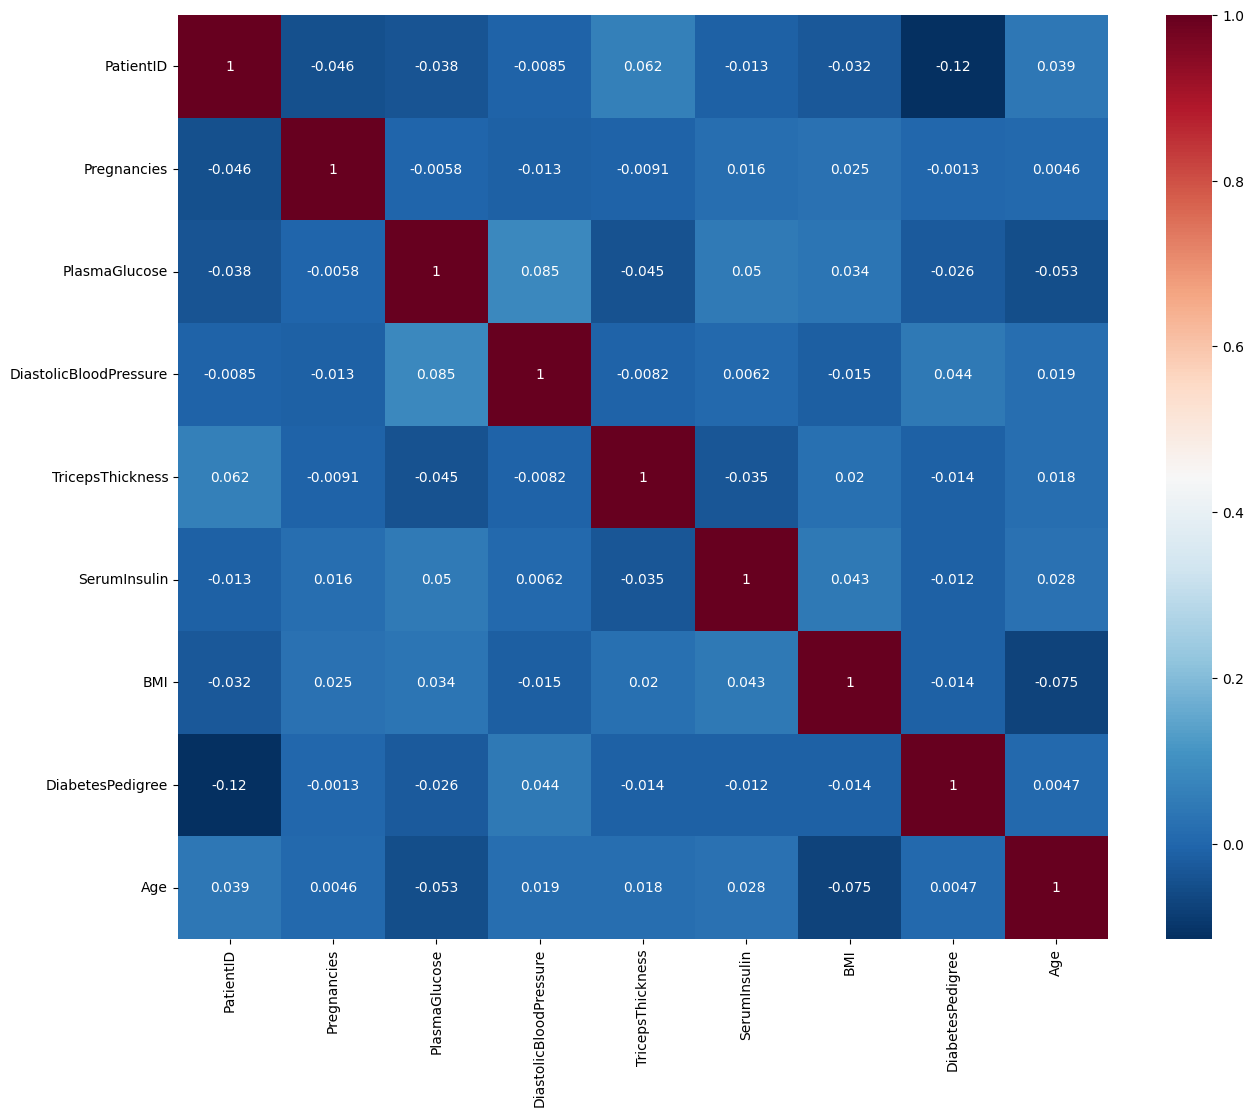

In [ ]:
# Visualize the resulting correlation matrix using a heatmap:
plt.figure(figsize=(15,12))
sns.heatmap(correlations, annot=True,cmap ='RdBu_r')
plt.show()

In [ ]:
# Loop over bottom diagonal of correlation matrix
for i in range(len(correlations.columns)):
    for j in range(i):
        # Print variables with high correlation
        if abs(correlations.iloc[i, j]) > 0.7:
            print(correlations.columns[i], correlations.columns[j], correlations.iloc[i, j])
else:
    print('The coefficient of each features not greater than 0.7')

The coefficient of each features not greater than 0.7


In [ ]:
# Merge features and targets together for checking correlation
X_y = X.copy()
X_y['Diabetic'] = y
print(X_y)

     PatientID  Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
0            1            6            107                      83   
1            2            3            163                      84   
2            3           12            124                      53   
3            4           14            169                      51   
4            5           10             70                      98   
..         ...          ...            ...                     ...   
695        696           13             60                      98   
696        697            1             89                     119   
697        698            2             60                      91   
698        699            8            162                      95   
699        700            6             88                      93   

     TricepsThickness  SerumInsulin   BMI  DiabetesPedigree  Age  Diabetic  
0                  15           196  50.0              0.84   78         0  
1    

In [ ]:
correlation = X_y.corr()
correlation_target = correlation[['Diabetic']].drop(labels=['Diabetic'])
correlation_target

,Diabetic
PatientID,0.011550
Pregnancies,0.030776
PlasmaGlucose,0.074720
DiastolicBloodPressure,-0.033216
TricepsThickness,-0.008456
SerumInsulin,0.005446
BMI,-0.013162
DiabetesPedigree,0.007177
Age,0.029075


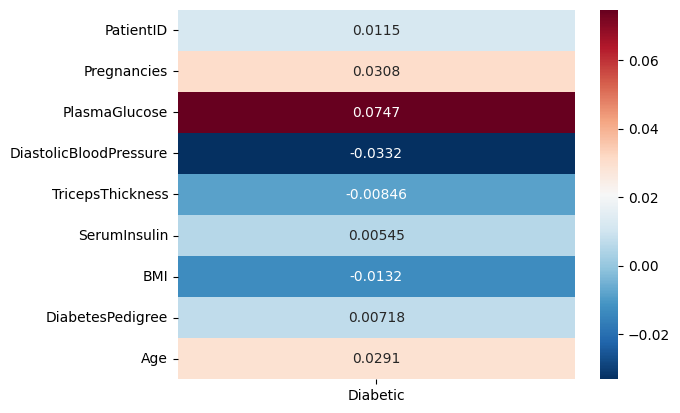

In [ ]:
sns.heatmap(correlation_target, annot=True, fmt='.3', cmap='RdBu_r')
plt.show()

In [ ]:
X = X.drop(columns=['PatientID'])
print(X.columns) # Check the feature matrix
X.head()

Index(['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure',
       'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age'],
      dtype='object')


,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
0,6,107,83,15,196,50.0,0.84,78
1,3,163,84,18,120,21.4,1.10,71
2,12,124,53,42,231,34.0,1.81,29
3,14,169,51,34,219,30.3,1.03,21
4,10,70,98,22,84,45.7,1.51,21


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaler = pd.DataFrame(scaler.fit_transform(X),columns=['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure',
       'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age'])
X_scaler.head()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
0,-0.208071,-0.406013,0.345602,-1.265031,0.491725,1.712194,-0.667421,1.623547
1,-0.894018,0.866939,0.384229,-1.001927,-0.447753,-1.446149,-0.291153,1.221008
2,1.163824,-0.019581,-0.813210,1.102909,0.924379,-0.054711,0.736348,-1.194227
3,1.621122,1.003326,-0.890464,0.401297,0.776040,-0.463308,-0.392456,-1.654272
4,0.706526,-1.247071,0.925008,-0.651121,-0.892768,1.237338,0.302193,-1.654272


**Importing model training and feature selection libraries**

Wrapper Method Function (Sequential Forward Selection with Supervised Learning Algorithms)

In [ ]:
def feature_selection(dt_model, x_data):

    # Ensure the random distributions are same when execute
    np.random.seed(0)

    sfs = SFS(dt_model,
          k_features=8,
          forward=True,
          floating=False,
          scoring='accuracy',
          cv=5)

    sfs.fit(x_data, y)

    print('Feature selection: \n\n')
    for idx, score in sfs.subsets_.items():
    	print(idx,':', score, '\n')

    print('Model Accuracy: \n\n')
    for idx, score in sfs.subsets_.items():
        print(idx,':', score['avg_score'].round(4)*100, '%')

    plot_sfs(sfs.get_metric_dict())
    plt.grid()
    plt.title('Accuracy vs Number of Features')
    plt.show()

**Define the confusion matrix plotting Function**

In [ ]:
def conf_matrix_plot(conf_matrix):

    ax = sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')

    ax.set_title('Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['Negative','Positive'])
    ax.yaxis.set_ticklabels(['Negative','Positive'])

    ## Display the visualization of the Confusion Matrix.
    plt.plot(conf_matrix)
    plt.show()

In [ ]:
def class_report_plot(class_report):

    plt.figure(figsize=(10,3))
    plt.title('Model Classification Report\n\n')
    sns.heatmap(class_report, annot=True,  fmt='g')
    plt.show()

**Define the AUC ROC plotting function**

In [ ]:
def auc_roc(model,y_test,y_predicted):

    fpr, tpr, _ = metrics.roc_curve(y_test, y_predicted)
    auc = round(metrics.roc_auc_score(y_test, y_predicted), 4)
    plt.plot(fpr,tpr,color='red', linestyle='--', marker='o', linewidth=2, label= model+" AUC="+str(auc))
    plt.grid()
    plt.legend()
    plt.title('AUC ROC of '+ model)
    plt.xlabel('False Positive')
    plt.ylabel('True Positive')
    plt.show()

**Decision Tree Algorithm**

Feature selection: 


1 : {'feature_idx': (7,), 'cv_scores': array([0.50714286, 0.51428571, 0.56428571, 0.53571429, 0.51428571]), 'avg_score': 0.5271428571428571, 'feature_names': ('Age',)} 

2 : {'feature_idx': (2, 7), 'cv_scores': array([0.52857143, 0.52142857, 0.55      , 0.55714286, 0.48571429]), 'avg_score': 0.5285714285714287, 'feature_names': ('DiastolicBloodPressure', 'Age')} 

3 : {'feature_idx': (1, 2, 7), 'cv_scores': array([0.50714286, 0.55      , 0.48571429, 0.60714286, 0.52142857]), 'avg_score': 0.5342857142857143, 'feature_names': ('PlasmaGlucose', 'DiastolicBloodPressure', 'Age')} 

4 : {'feature_idx': (1, 2, 6, 7), 'cv_scores': array([0.50714286, 0.56428571, 0.52142857, 0.5       , 0.47142857]), 'avg_score': 0.5128571428571429, 'feature_names': ('PlasmaGlucose', 'DiastolicBloodPressure', 'DiabetesPedigree', 'Age')} 

5 : {'feature_idx': (1, 2, 5, 6, 7), 'cv_scores': array([0.51428571, 0.56428571, 0.50714286, 0.54285714, 0.5       ]), 'avg_score': 0.5257142857142857, 'f

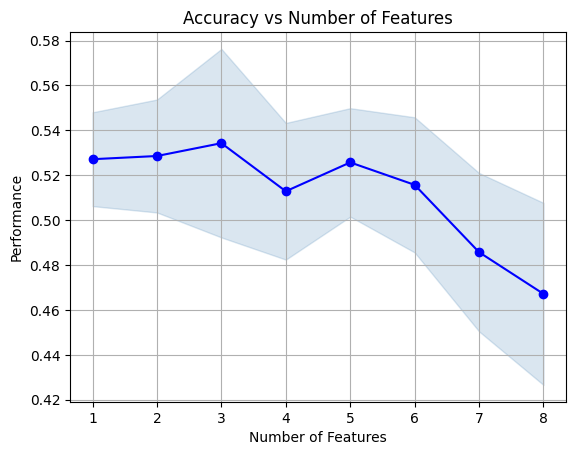

In [ ]:
# Decision Tree Algorithm
start_time = time.time()
initial_memory = process.memory_info().rss

dt_model = DecisionTreeClassifier()

# Import feature_selection function
feature_selection(dt_model, X)

In [ ]:
 # From wrapper method, we know which features removed was useful to increase accuracy of model.
X_data = X[['Pregnancies', 'PlasmaGlucose', 'TricepsThickness', 'SerumInsulin', 'BMI', 'Age']]

# Split 80% data for training set
X_rem, X_test, y_rem, y_test = train_test_split(X_data, y, test_size=0.25, random_state=6)

# Split 10% data for validation set and 10% for test set
X_train, X_val, y_train, y_val = train_test_split(X_rem, y_rem, train_size=0.9, random_state=6)

dt_model.fit(X_train,y_train)

# Using validation set to observe the accuracy during model training
y_val_pred = dt_model.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
print("Validation set accuracy after feature selection: ", round(accuracy*100,2), "%\n")

Validation set accuracy after feature selection:  39.62 %



Validation set accuracy after hyperparameter tuning:  49.06 %

Decision Tree Model Test Set Accuracy:  53.14 %

Decision Tree Model Confusion Matrix: 



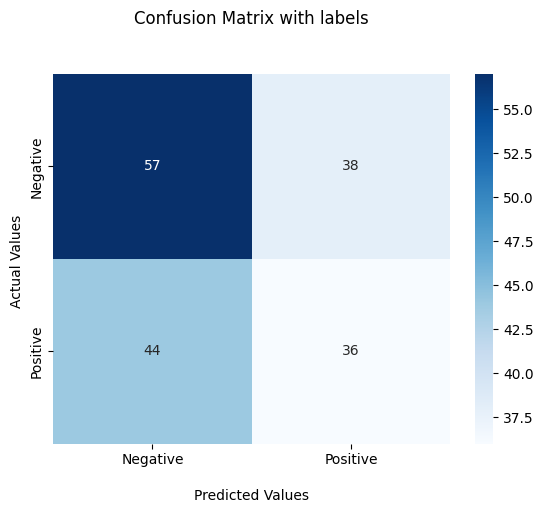

Decision Tree Model Classification Report: 



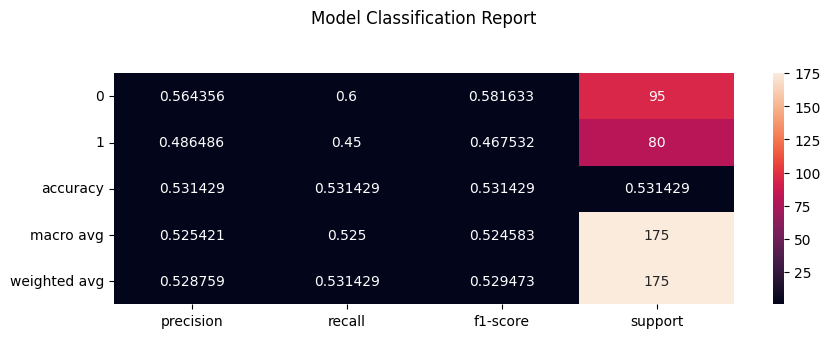

Memory usage: -6762496 bytes

Runtime: 126.88 s


In [ ]:
dt_model = DecisionTreeClassifier(max_depth=10, max_leaf_nodes=40)

dt_model.fit(X_train,y_train)

# Using validation set to get the accuracy after model training
y_val_pred = dt_model.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
print("Validation set accuracy after hyperparameter tuning: ", round(accuracy*100,2), "%\n")

y_predicted_dt = dt_model.predict(X_test)
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_predicted_dt)
print("Decision Tree Model Test Set Accuracy: ", round(accuracy*100,2), "%\n")

conf_matrix = confusion_matrix(y_test, y_predicted_dt)
print("Decision Tree Model Confusion Matrix: \n")
conf_matrix_plot(conf_matrix)

class_report = pd.DataFrame(classification_report(y_test, y_predicted_dt, output_dict=True)).transpose()
print("Decision Tree Model Classification Report: \n")
class_report_plot(class_report)

end_time = time.time()
run_time = end_time - start_time

final_memory = process.memory_info().rss
memory_usage = final_memory - initial_memory

print("Memory usage:", memory_usage, 'bytes\n')
print("Runtime:", round(run_time,2), 's')

**K Nearest Neighbors Algorithm**

Feature selection: 


1 : {'feature_idx': (2,), 'cv_scores': array([0.52857143, 0.62857143, 0.55714286, 0.5       , 0.5       ]), 'avg_score': 0.5428571428571429, 'feature_names': ('DiastolicBloodPressure',)} 

2 : {'feature_idx': (1, 2), 'cv_scores': array([0.55      , 0.59285714, 0.55      , 0.55      , 0.41428571]), 'avg_score': 0.5314285714285714, 'feature_names': ('PlasmaGlucose', 'DiastolicBloodPressure')} 

3 : {'feature_idx': (1, 2, 6), 'cv_scores': array([0.57857143, 0.5       , 0.50714286, 0.55      , 0.51428571]), 'avg_score': 0.53, 'feature_names': ('PlasmaGlucose', 'DiastolicBloodPressure', 'DiabetesPedigree')} 

4 : {'feature_idx': (0, 1, 2, 6), 'cv_scores': array([0.55      , 0.5       , 0.50714286, 0.55714286, 0.51428571]), 'avg_score': 0.5257142857142857, 'feature_names': ('Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure', 'DiabetesPedigree')} 

5 : {'feature_idx': (0, 1, 2, 3, 6), 'cv_scores': array([0.50714286, 0.52142857, 0.53571429, 0.51428571, 0.53571429]),

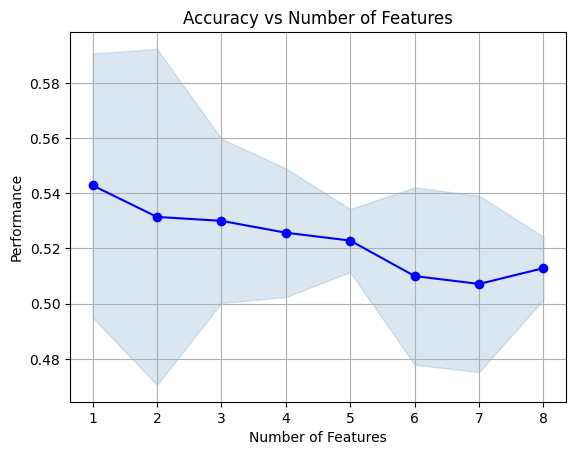

In [ ]:
start_time = time.time()
initial_memory = process.memory_info().rss

knn_model = KNeighborsClassifier()

feature_selection(knn_model, X_scaler)

In [ ]:
X_data = X_scaler[['Pregnancies', 'SerumInsulin', 'BMI', 'Age']]

# Split 80% data for training set
X_rem, X_test, y_rem, y_test = train_test_split(X_data, y, test_size=0.25, random_state=6)

# Split 10% data for validation set and 10% for test set
X_train, X_val, y_train, y_val = train_test_split(X_rem, y_rem, train_size=0.9, random_state=6)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train)

# Using validation set to observe the accuracy during model training
y_val_pred = knn_model.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
print("Validation set accuracy after feature selection: ", round(accuracy*100,2), "%\n")

Validation set accuracy after feature selection:  39.62 %



The maximum accuracy is 62.264150943396224 when the K value is [2] after feature selection.



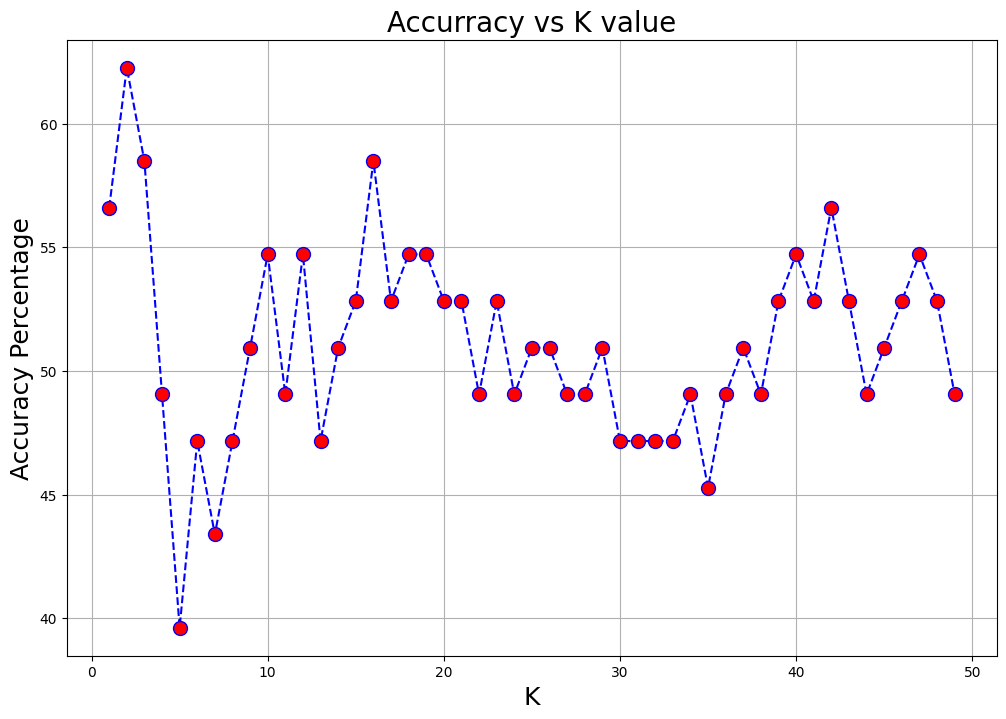

In [ ]:
# Define the best value of K in KNN
score_list = []
for k in range(1,50):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    score = model.score(X_val, y_val)
    score_list.append(score*100)

max_score = max(score_list)

k = [idx+1 for idx, score in enumerate(score_list) if score == max_score]
print(f'The maximum accuracy is {max_score} when the K value is {k} after feature selection.\n')

plt.figure(figsize=(12,8))
plt.plot(range(1,50), score_list, color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Accurracy vs K value',size=20)
plt.xlabel('K',size=18)
plt.ylabel('Accuracy Percentage',size=18)
plt.grid()
plt.show()

Validation set accuracy after hyperparameter tuning:  47.17 %

K Nearest Neighbor Model Test Set Accuracy:  48.57 %

K Nearest Neighbor Model Confusion Matrix: 



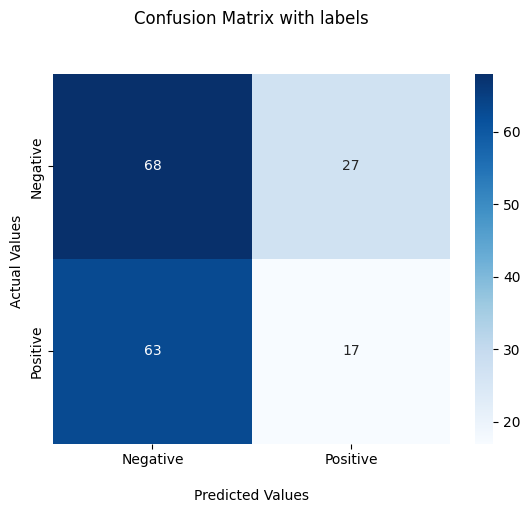

K Nearest Neighbor Model Classification Report: 



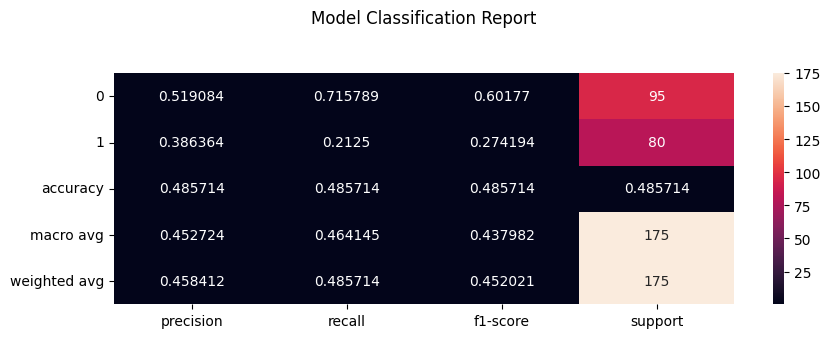

Memory usage: 0 bytes

Runtime: 49.12 s


In [ ]:
knn_model = KNeighborsClassifier(6)

knn_model.fit(X_train,y_train)

# Using validation set to get the accuracy after model training
y_val_pred = knn_model.predict(X_val)
y_prob_knn = knn_model.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_val, y_val_pred)
print("Validation set accuracy after hyperparameter tuning: ", round(accuracy*100,2), "%\n")

y_predicted_knn = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_predicted_knn)
print("K Nearest Neighbor Model Test Set Accuracy: ", round(accuracy*100,2), "%\n")

conf_matrix = confusion_matrix(y_test, y_predicted_knn)
print("K Nearest Neighbor Model Confusion Matrix: \n")
conf_matrix_plot(conf_matrix)

class_report = pd.DataFrame(classification_report(y_test, y_predicted_knn, output_dict=True)).transpose()
print("K Nearest Neighbor Model Classification Report: \n")
class_report_plot(class_report)


end_time = time.time()
run_time = end_time - start_time

final_memory = process.memory_info().rss
memory_usage = final_memory - initial_memory

print("Memory usage:", memory_usage, 'bytes\n')

print("Runtime:", round(run_time,2), 's')

**Logistic Regression Algorithm**

Feature selection: 


1 : {'feature_idx': (3,), 'cv_scores': array([0.52857143, 0.52142857, 0.52142857, 0.52142857, 0.52142857]), 'avg_score': 0.5228571428571429, 'feature_names': ('TricepsThickness',)} 

2 : {'feature_idx': (3, 5), 'cv_scores': array([0.52857143, 0.53571429, 0.52142857, 0.52142857, 0.52142857]), 'avg_score': 0.5257142857142857, 'feature_names': ('TricepsThickness', 'BMI')} 

3 : {'feature_idx': (1, 3, 5), 'cv_scores': array([0.57857143, 0.54285714, 0.39285714, 0.51428571, 0.57857143]), 'avg_score': 0.5214285714285715, 'feature_names': ('PlasmaGlucose', 'TricepsThickness', 'BMI')} 

4 : {'feature_idx': (1, 3, 5, 6), 'cv_scores': array([0.57857143, 0.52857143, 0.39285714, 0.52142857, 0.57857143]), 'avg_score': 0.52, 'feature_names': ('PlasmaGlucose', 'TricepsThickness', 'BMI', 'DiabetesPedigree')} 

5 : {'feature_idx': (1, 3, 4, 5, 6), 'cv_scores': array([0.57857143, 0.5       , 0.39285714, 0.52142857, 0.57142857]), 'avg_score': 0.5128571428571428, 'feature_names': ('Pl

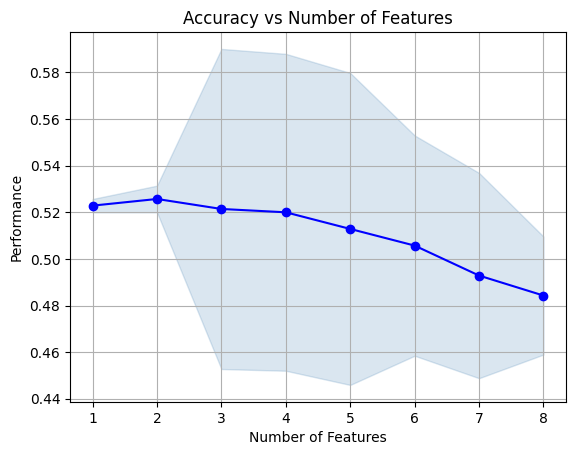

In [ ]:
# Logistic Regression Algorithm
start_time = time.time()
initial_memory = process.memory_info().rss

# The initial value of maximum iteration cannot converge
lr_model = LogisticRegression(max_iter=1000)

# Import feature_selection function
feature_selection(lr_model, X)

In [ ]:
# Split 80% data for training set
X_rem, X_test, y_rem, y_test = train_test_split(X, y, test_size=0.25, random_state=6)

# Split 10% data for validation set and 10% for test set
X_train, X_val, y_train, y_val = train_test_split(X_rem, y_rem, train_size=0.9, random_state=6)

lr_model.fit(X_train,y_train)

# Using validation set to observe the accuracy during model training
y_val_pred = lr_model.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
print("Validation set accuracy after feature selection: ", round(accuracy*100,2), "%\n")

Validation set accuracy after feature selection:  37.74 %



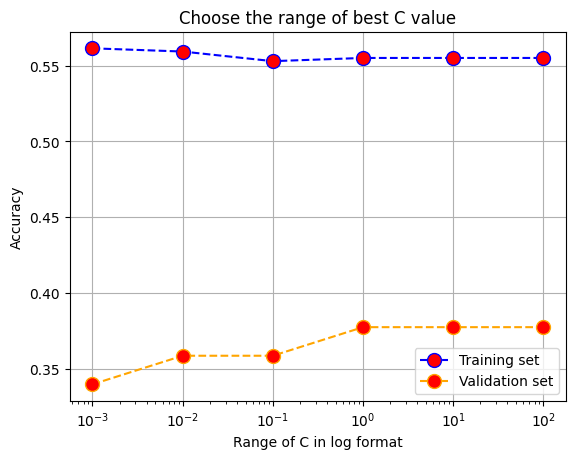

In [ ]:
train_array = []
test_array = []
C_array = [0.001, 0.01, 0.1, 1, 10, 100]

for x in C_array:
    clf_new = LogisticRegression(max_iter=1000, C=x)
    clf_new.fit(X_train,y_train)
    y_pred_train = clf_new.predict(X_train)
    train_array.append(accuracy_score(y_pred_train,y_train))
    y_pred_val = clf_new.predict(X_val)
    test_array.append(accuracy_score(y_pred_val,y_val))

plt.plot(C_array,train_array, color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.plot(C_array,test_array, color='orange', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.legend(['Training set', 'Validation set'])
plt.title('Choose the range of best C value')
plt.xlabel('Range of C in log format')
plt.ylabel('Accuracy')
plt.grid()
plt.xscale('log')
plt.show()

Validation set accuracy after hyperparameter tuning:  35.85 %

Logistic Regression Model Test set accuracy:  48.57 %

Logistic Regression Model Confusion Matrix: 



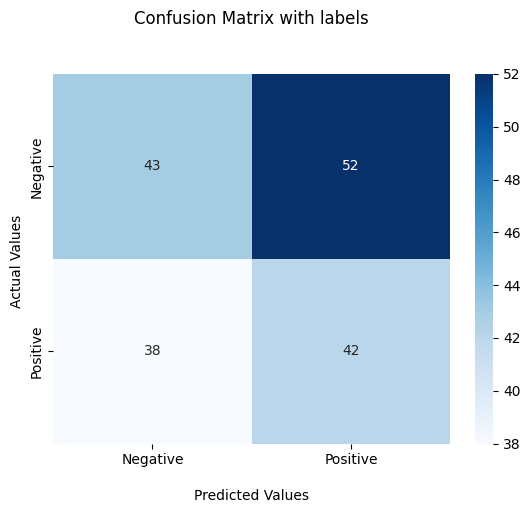

Logistic Regression Model Classification Report: 



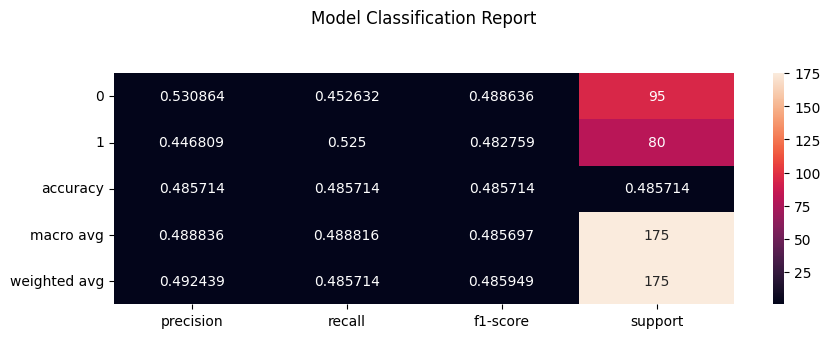

Memory usage: 1146880 bytes

Runtime: 50.46 s


In [ ]:
# Logistic Regression Algorithm
lr_model = LogisticRegression(max_iter=10000,C=0.059,penalty='l2',solver='lbfgs')

lr_model.fit(X_train,y_train)

# Using validation set to get the accuracy after model training
y_val_pred = lr_model.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
print("Validation set accuracy after hyperparameter tuning: ", round(accuracy*100,2), "%\n")

# Using test set to get the accuracy after model training

y_predicted_lr = lr_model.predict(X_test)
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test,y_predicted_lr)
print("Logistic Regression Model Test set accuracy: ", round(accuracy*100,2), "%\n")

conf_matrix = confusion_matrix(y_test, y_predicted_lr)
print("Logistic Regression Model Confusion Matrix: \n")
conf_matrix_plot(conf_matrix)

class_report = pd.DataFrame(classification_report(y_test,y_predicted_lr, output_dict=True)).transpose()
print("Logistic Regression Model Classification Report: \n")
class_report_plot(class_report)


end_time = time.time()
run_time = end_time - start_time

final_memory = process.memory_info().rss
memory_usage = final_memory - initial_memory

print("Memory usage:", memory_usage, 'bytes\n')

print("Runtime:", round(run_time,2), 's')

**Random Forests Algorithm**

Feature selection: 


1 : {'feature_idx': (7,), 'cv_scores': array([0.53571429, 0.53571429, 0.55714286, 0.55      , 0.55714286]), 'avg_score': 0.5471428571428572, 'feature_names': ('Age',)} 

2 : {'feature_idx': (4, 7), 'cv_scores': array([0.55      , 0.49285714, 0.52857143, 0.47857143, 0.56428571]), 'avg_score': 0.5228571428571429, 'feature_names': ('SerumInsulin', 'Age')} 

3 : {'feature_idx': (0, 4, 7), 'cv_scores': array([0.53571429, 0.52857143, 0.54285714, 0.49285714, 0.5       ]), 'avg_score': 0.52, 'feature_names': ('Pregnancies', 'SerumInsulin', 'Age')} 

4 : {'feature_idx': (0, 4, 6, 7), 'cv_scores': array([0.52142857, 0.51428571, 0.59285714, 0.5       , 0.44285714]), 'avg_score': 0.5142857142857142, 'feature_names': ('Pregnancies', 'SerumInsulin', 'DiabetesPedigree', 'Age')} 

5 : {'feature_idx': (0, 3, 4, 6, 7), 'cv_scores': array([0.5       , 0.48571429, 0.57142857, 0.49285714, 0.48571429]), 'avg_score': 0.5071428571428571, 'feature_names': ('Pregnancies', 'TricepsThickness

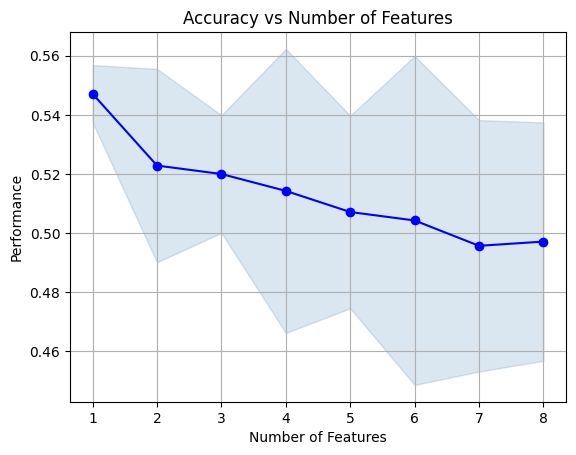

In [ ]:
start_time = time.time()
initial_memory = process.memory_info().rss

rf_model = RandomForestClassifier()

feature_selection(rf_model,X)

In [ ]:
X_data = X[['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure', 'TricepsThickness', 'SerumInsulin', 'BMI', 'Age']]

# Split 80% data for training set
X_rem, X_test, y_rem, y_test = train_test_split(X_data, y, test_size=0.25, random_state=10)

# Split 10% data for validation set and 10% for test set
X_train, X_val, y_train, y_val = train_test_split(X_rem, y_rem, train_size=0.9, random_state=10)

rf_model.fit(X_train,y_train)

# Using validation set to observe the accuracy during model training
y_val_pred = rf_model.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
print("Validation set accuracy after feature selection: ", round(accuracy*100,2), "%\n")

Validation set accuracy after feature selection:  50.94 %



Validation set accuracy is 56.604 % after the maximum depth of the tree was defined is 1


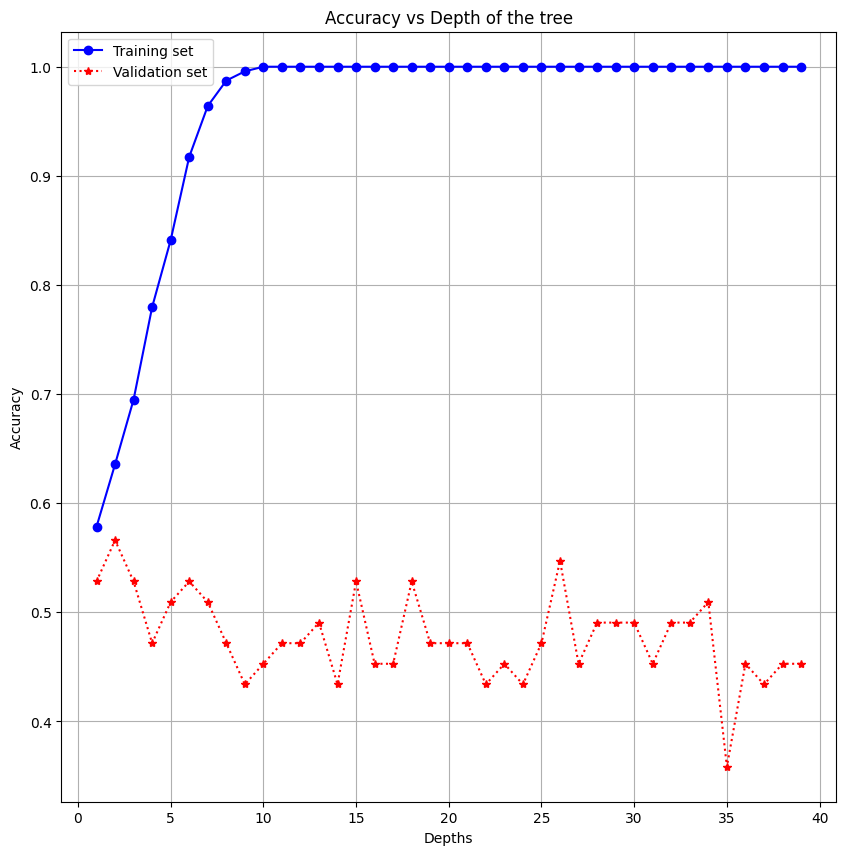

In [ ]:
accuracy_train = []
accuracy_test = []

np.random.seed(0)
depths = range(1,40)
for i in depths:
    crf = RandomForestClassifier(max_depth=i)
    crf.fit(X_train, y_train)
    accuracy_test.append(accuracy_score(y_val, crf.predict(X_val)))
    accuracy_train.append(accuracy_score(y_train, crf.predict(X_train)))

max_accuracy = np.max(accuracy_test)*100
max_depth = np.argmax(accuracy_test)

print('Validation set accuracy is', round(max_accuracy,3) ,'% after the maximum depth of the tree was defined is', max_depth)

plt.figure(figsize=(10,10))
plt.plot(depths,accuracy_train,'bo-',depths,accuracy_test,'r*:')
plt.grid()
plt.legend(['Training set','Validation set'])
plt.title('Accuracy vs Depth of the tree')
plt.xlabel('Depths')
plt.ylabel('Accuracy')

plt.show()

Validation set accuracy after hyperparameter tuning:  49.06 %

Random Forest Model Test Set Accuracy: 53.14 %

Random Forest Model Confusion Matrix: 



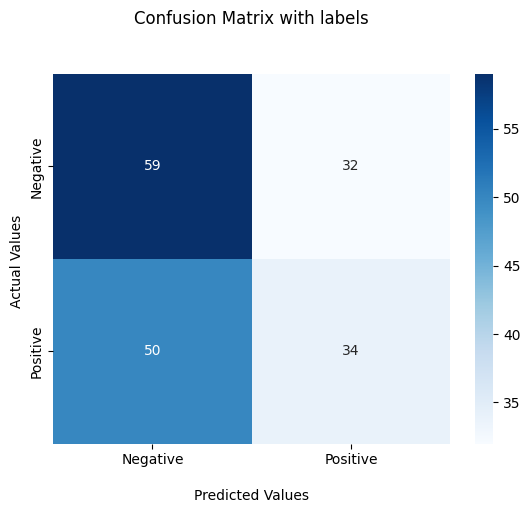

Random Forest Model Classification Report: 



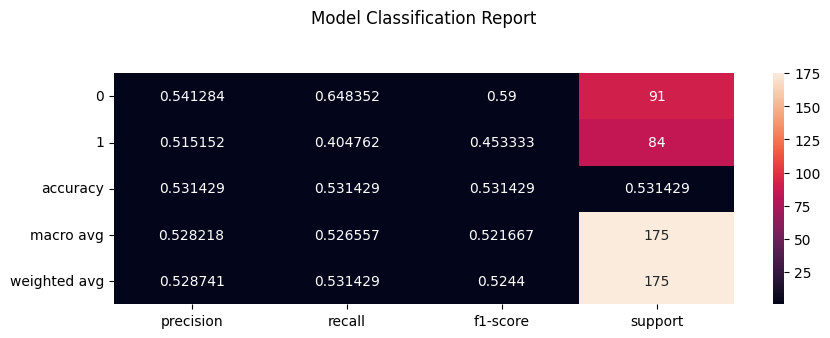

Memory usage: 0 bytes

Runtime: 1.75 s


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import time
import psutil
import matplotlib.pyplot as plt

# Start time tracking and memory usage tracking
start_time = time.time()
process = psutil.Process()
initial_memory = process.memory_info().rss

# Initialize the Random Forest model with valid parameters
rf_model = RandomForestClassifier(
    max_depth=40,
    max_features='sqrt',  # Change 'auto' to 'sqrt' or 'log2'
    n_estimators=100,
    min_samples_leaf=1,
    min_samples_split=2,  # Set this to 2 or any integer >= 2
)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Validation set prediction and accuracy
y_val_pred = rf_model.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
print("Validation set accuracy after hyperparameter tuning: ", round(accuracy*100, 2), "%\n")

# Test set prediction and accuracy
y_predicted_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
accuracy = rf_model.score(X_test, y_test) * 100
print("Random Forest Model Test Set Accuracy:", round(accuracy, 2), "%\n")

# Confusion matrix and plot
conf_matrix = confusion_matrix(y_test, y_predicted_rf)
print("Random Forest Model Confusion Matrix: \n")
conf_matrix_plot(conf_matrix)  # Make sure you have this function defined elsewhere

# Classification report and plot
class_report = pd.DataFrame(classification_report(y_test, y_predicted_rf, output_dict=True)).transpose()
print("Random Forest Model Classification Report: \n")
class_report_plot(class_report)  # Make sure you have this function defined elsewhere

# End time tracking and memory usage tracking
end_time = time.time()
run_time = end_time - start_time

final_memory = process.memory_info().rss
memory_usage = final_memory - initial_memory

# Print memory usage and runtime
print("Memory usage:", memory_usage, 'bytes\n')
print("Runtime:", round(run_time, 2), 's')


**Support Vector Machine (SVM) Algorithm**

Feature selection: 


1 : {'feature_idx': (0,), 'cv_scores': array([0.52857143, 0.52142857, 0.52142857, 0.52142857, 0.52142857]), 'avg_score': 0.5228571428571429, 'feature_names': ('Pregnancies',)} 

2 : {'feature_idx': (0, 5), 'cv_scores': array([0.52857143, 0.52142857, 0.52142857, 0.52142857, 0.52142857]), 'avg_score': 0.5228571428571429, 'feature_names': ('Pregnancies', 'BMI')} 

3 : {'feature_idx': (0, 5, 6), 'cv_scores': array([0.52857143, 0.52142857, 0.52142857, 0.52142857, 0.52142857]), 'avg_score': 0.5228571428571429, 'feature_names': ('Pregnancies', 'BMI', 'DiabetesPedigree')} 

4 : {'feature_idx': (0, 3, 5, 6), 'cv_scores': array([0.52857143, 0.46428571, 0.52142857, 0.52142857, 0.52142857]), 'avg_score': 0.5114285714285713, 'feature_names': ('Pregnancies', 'TricepsThickness', 'BMI', 'DiabetesPedigree')} 

5 : {'feature_idx': (0, 3, 5, 6, 7), 'cv_scores': array([0.54285714, 0.45714286, 0.52142857, 0.47142857, 0.57142857]), 'avg_score': 0.5128571428571428, 'feature_names': ('Pr

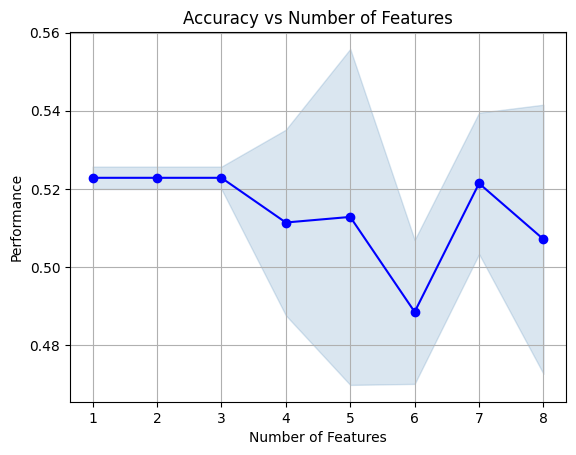

In [ ]:
start_time = time.time()
initial_memory = process.memory_info().rss

# Initialize the value of C, kernel & gamma
svm_model = SVC(C=1,kernel='rbf',gamma=0.001)

feature_selection(svm_model, X)

In [ ]:
X_data = X[['Pregnancies', 'PlasmaGlucose', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age']]

# Split 25% data for test set
X_rem, X_test, y_rem, y_test = train_test_split(X_data, y, test_size=0.25, random_state=6)

# Split 10% data for validation set from training set
X_train, X_val, y_train, y_val = train_test_split(X_rem, y_rem, train_size=0.9, random_state=6)

svm_model.fit(X_train,y_train)

# Using validation set to observe the accuracy during model training
y_val_pred = svm_model.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
print("Validation set accuracy before feature selection: ", round(accuracy*100,2), "%\n")

Validation set accuracy before feature selection:  43.4 %



Support Vector Machine Model Validation Set Accuracy: 49.06 %

Support Vector Machine Model Test Set Accuracy: 50.86 %

Support Vector Machine Model Confusion Matrix: 



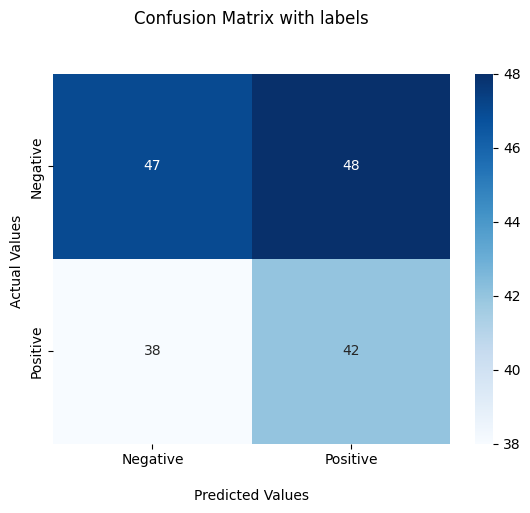

Support Vector Machine Model Classification Report: 



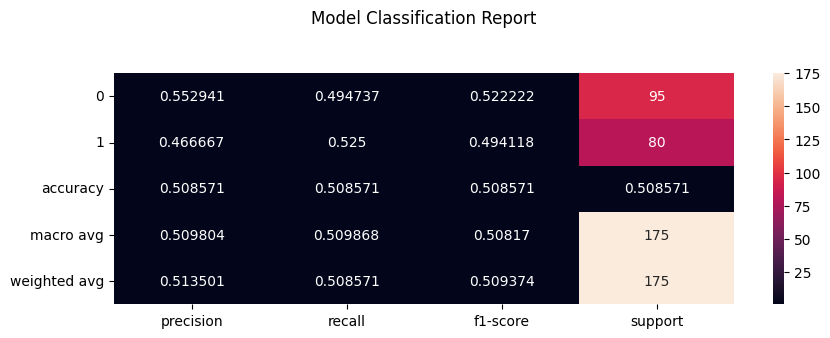

Memory usage: 0 bytes

Runtime: 46.04 s


In [ ]:
svm_model = SVC(C=1000,
               kernel='rbf',
               gamma=0.0001,
               probability=True)

svm_model.fit(X_train,y_train)


y_predicted_svm = svm_model.predict(X_test)
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]
accuracy = svm_model.score(X_val,y_val)*100
print("Support Vector Machine Model Validation Set Accuracy:", round(accuracy,2), "%\n")

#  the accuracy of the final model on the test data
accuracy = svm_model.score(X_test,y_test)*100
print("Support Vector Machine Model Test Set Accuracy:", round(accuracy,2), "%\n")

conf_matrix = confusion_matrix(y_test, y_predicted_svm)
print("Support Vector Machine Model Confusion Matrix: \n")
conf_matrix_plot(conf_matrix)

class_report = pd.DataFrame(classification_report(y_test, y_predicted_svm, output_dict=True)).transpose()
print("Support Vector Machine Model Classification Report: \n")
class_report_plot(class_report)



end_time = time.time()
run_time = end_time - start_time

final_memory = process.memory_info().rss
memory_usage = final_memory - initial_memory

print("Memory usage:", memory_usage, 'bytes\n')

print("Runtime:", round(run_time,2), 's')

**LGBM Algorithm**

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

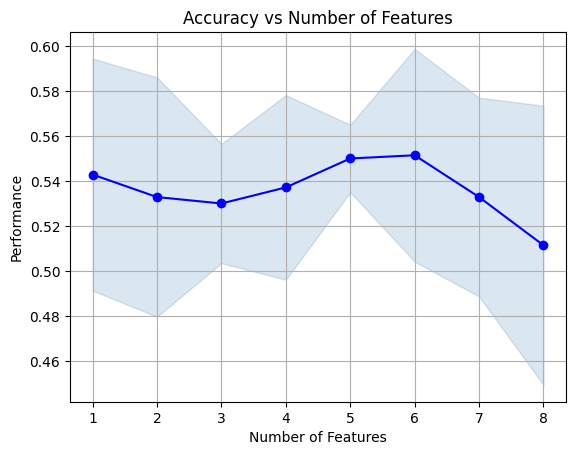

In [ ]:
start_time = time.time()
initial_memory = process.memory_info().rss

lgbm_model = LGBMClassifier()

feature_selection(lgbm_model,X)

In [ ]:
# Split 25% data for test set
X_rem, X_test, y_rem, y_test = train_test_split(X, y, test_size=0.25, random_state=6)

# Split 10% data for validation set from training set
X_train, X_val, y_train, y_val = train_test_split(X_rem, y_rem, train_size=0.9, random_state=6)

lgbm_model.fit(X_train,y_train)

# Using validation set to observe the accuracy during model training
y_val_pred = lgbm_model.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
print("Validation set accuracy after feature selection: ", round(accuracy*100,2), "%\n")

[LightGBM] [Info] Number of positive: 233, number of negative: 239
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000097 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 472, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.493644 -> initscore=-0.025425
[LightGBM] [Info] Start training from score -0.025425
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[LightGBM] [Info] Number of positive: 233, number of negative: 239
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000080 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 472, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.493644 -> initscore=-0.025425
[LightGBM] [Info] Start training from score -0.025425
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

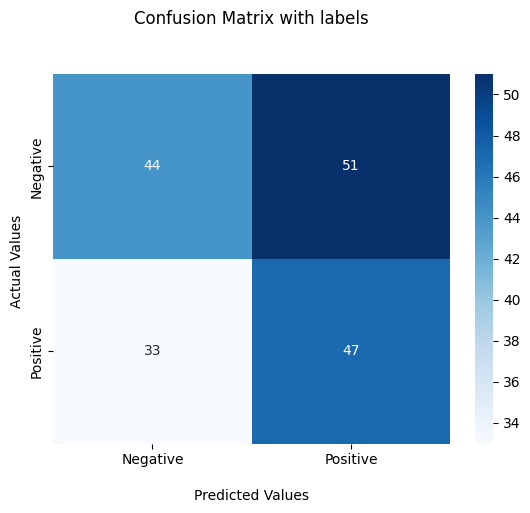

LGBM Classifier Model Classification Report: 



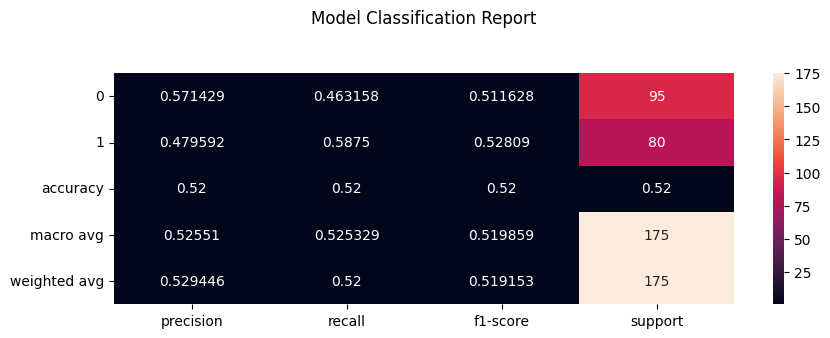

Memory usage: 2023424 bytes

Runtime: 73.22 s


In [ ]:
lgbm_model = LGBMClassifier( max_depth=15,
                             num_leaves= 30,
                             n_estimators=100,
                             subsample=0.8,
                             colsample_bytree=0.1
                           )

lgbm_model.fit(X_train,y_train)

y_val_pred = lgbm_model.predict(X_val)
y_prob_lgbm = lgbm_model.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_val, y_val_pred)
print("\nValidation set accuracy after hyperparameter tuning: ", round(accuracy*100,2), "%\n")

y_predicted_lgbm = lgbm_model.predict(X_test)
accuracy = lgbm_model.score(X_test,y_test)*100
print("LGBM Classifier Model Test set accuracy:", round(accuracy,2), "%\n")

conf_matrix = confusion_matrix(y_test, y_predicted_lgbm)
print("LGBM Classifier Model Confusion Matrix: \n")
conf_matrix_plot(conf_matrix)

class_report = pd.DataFrame(classification_report(y_test, y_predicted_lgbm, output_dict=True)).transpose()
print("LGBM Classifier Model Classification Report: \n")
class_report_plot(class_report)

end_time = time.time()
run_time = end_time - start_time

final_memory = process.memory_info().rss
memory_usage = final_memory - initial_memory

print("Memory usage:", memory_usage, 'bytes\n')

print("Runtime:", round(run_time,2), 's')

0.5303


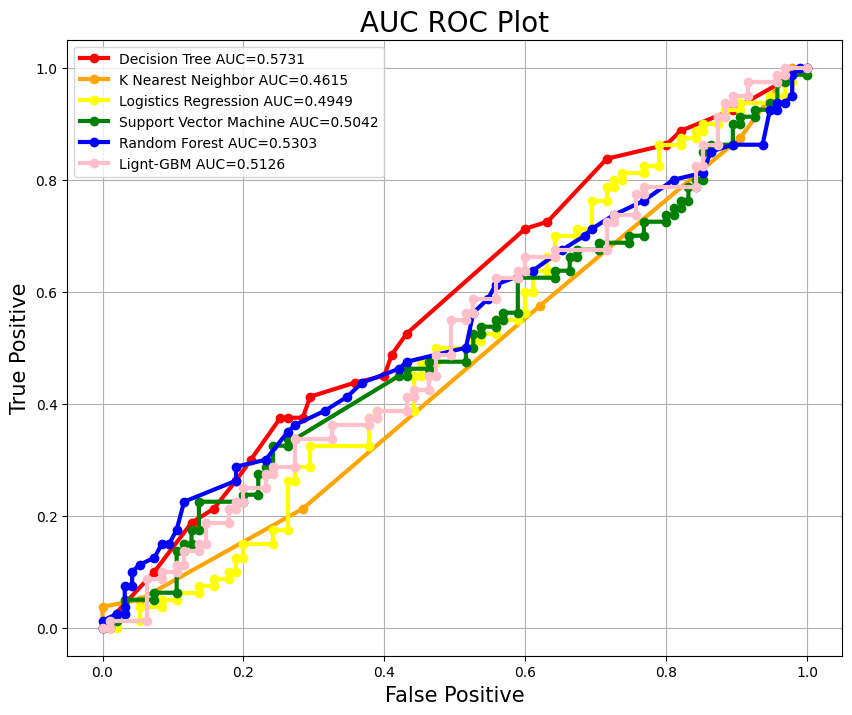

In [ ]:
fpr1, tpr1, thresh1 = roc_curve(y_test, y_prob_dt, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, y_prob_knn, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, y_prob_lr, pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, y_prob_svm, pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, y_prob_rf, pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test, y_prob_lgbm, pos_label=1)

auc1 = round(roc_auc_score(y_test, y_prob_dt), 4)
auc2 = round(roc_auc_score(y_test, y_prob_knn), 4)
auc3 = round(roc_auc_score(y_test, y_prob_lr), 4)
auc4 = round(roc_auc_score(y_test, y_prob_svm), 4)
auc5 = round(roc_auc_score(y_test, y_prob_rf), 4)
auc6 = round(roc_auc_score(y_test, y_prob_lgbm), 4)

print(auc5)

plt.figure(figsize=(10,8))

plt.plot(fpr1,tpr1,color='red', linestyle='-', marker='o', linewidth=3, label= "Decision Tree AUC="+str(auc1))
plt.plot(fpr2,tpr2,color='orange', linestyle='-', marker='o', linewidth=3, label= "K Nearest Neighbor AUC="+str(auc2))
plt.plot(fpr3,tpr3,color='yellow', linestyle='-', marker='o', linewidth=3, label= "Logistics Regression AUC="+str(auc3))
plt.plot(fpr4,tpr4,color='green', linestyle='-', marker='o', linewidth=3, label= "Support Vector Machine AUC="+str(auc4))
plt.plot(fpr5,tpr5,color='blue', linestyle='-', marker='o', linewidth=3, label= "Random Forest AUC="+str(auc5))
plt.plot(fpr6,tpr6,color='pink', linestyle='-', marker='o', linewidth=3, label= "Lignt-GBM AUC="+str(auc6))

plt.grid()
plt.legend(loc='best')
plt.title('AUC ROC Plot',size=20)
plt.xlabel('False Positive',size=15)
plt.ylabel('True Positive',size=15)
plt.show()

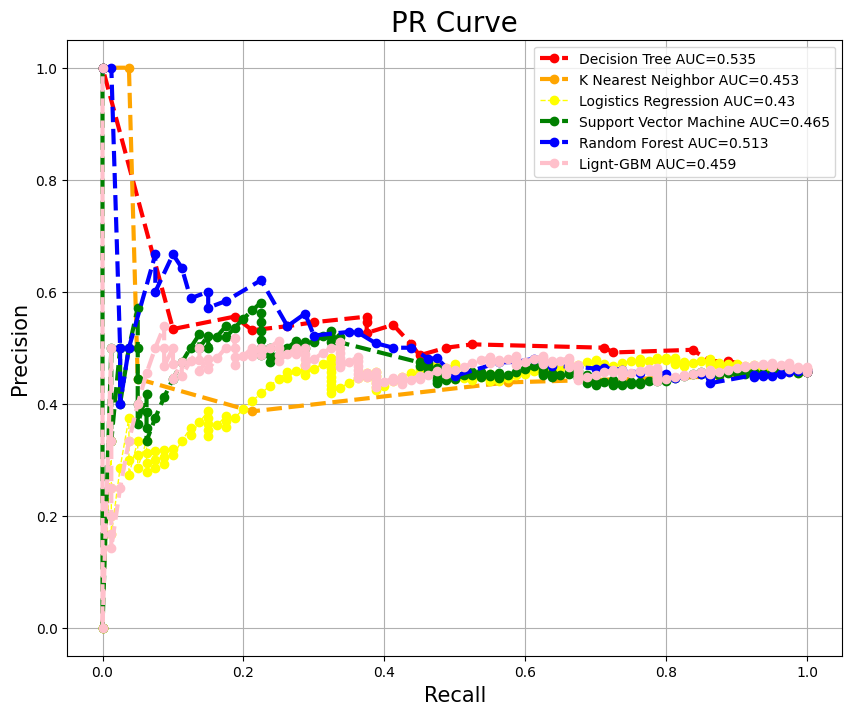

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

dt_precision, dt_recall, _ = precision_recall_curve(y_test, y_prob_dt)
knn_precision, knn_recall, _ = precision_recall_curve(y_test, y_prob_knn)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_prob_lr)
svm_precision, svm_recall, _ = precision_recall_curve(y_test, y_prob_svm)
rf_precision, rf_recall, _ = precision_recall_curve(y_test, y_prob_rf)
lgbm_precision, lgbm_recall, _ = precision_recall_curve(y_test, y_prob_lgbm)

dt_auc = auc(dt_recall, dt_precision).round(3)
knn_auc = auc(knn_recall, knn_precision).round(3)
lr_auc = auc(lr_recall, lr_precision).round(3)
svm_auc = auc(svm_recall, svm_precision).round(3)
rf_auc = auc(rf_recall, rf_precision).round(3)
lgbm_auc = auc(lgbm_recall, lgbm_precision).round(3)

plt.figure(figsize=(10,8))
plt.plot(dt_recall,dt_precision,color='red', linestyle='--', marker='o', linewidth=3, label= "Decision Tree AUC="+str(dt_auc))
plt.plot(knn_recall,knn_precision,color='orange', linestyle='--', marker='o', linewidth=3, label= "K Nearest Neighbor AUC="+str(knn_auc))
plt.plot(lr_recall,lr_precision,color='yellow', linestyle='--', marker='o', linewidth=1, label= "Logistics Regression AUC="+str(lr_auc))
plt.plot(svm_recall,svm_precision,color='green', linestyle='--', marker='o', linewidth=3, label= "Support Vector Machine AUC="+str(svm_auc))
plt.plot(rf_recall,rf_precision,color='blue', linestyle='--', marker='o', linewidth=3, label= "Random Forest AUC="+str(rf_auc))
plt.plot(lgbm_recall,lgbm_precision,color='pink', linestyle='--', marker='o', linewidth=3, label= "Lignt-GBM AUC="+str(lgbm_auc))


plt.grid()
plt.title('PR Curve',size=20)
plt.legend(loc='best')
plt.xlabel('Recall',size=15)
plt.ylabel('Precision',size=15)
plt.show()
